<center>
    
## 2.2. Pandas basics.

[**Pandas**](http://pandas.pydata.org/pandas-docs/stable/) это пакет для статистической обработки данных, по функциональности близкий к R. <br>
Основные типы объектов это **Series** (~ вектор как в numpy с индексацией) и **DataFrame** (классическая таблица как мы ее знаем с индексацией)

In [2]:
import pandas as pd

In [3]:
import numpy as np

## Series

`Series` в это одномерный набор данных, по сути дела вектор.<br> 
Сгенерируем данные, пускай это будут показатели температуры на термометре за эту неделю<br>
Отсутствующий данные записываются как `np.nan` (в этот день мы забыли записать показания или в нашем термометре села батарейка).<br>
Пропущенные значения это по сути `None` и не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.<br>

In [4]:
# np.NaN = Not a Number : SQL - NULL : BLANK()
l = [15,11,16,np.nan,14,13,12]
l_0 = [15,11,16, 0 , 0, 0, 0, 14,13,12]
s = pd.Series(l)

print(l, type(l))
print(s, type(s))

[15, 11, 16, nan, 14, 13, 12] <class 'list'>
0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64 <class 'pandas.core.series.Series'>


In [4]:
type(s)

pandas.core.series.Series


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [12]:
s.describe()

count     6.000000
mean     13.500000
std       1.870829
min      11.000000
25%      12.250000
50%      13.500000
75%      14.750000
max      16.000000
dtype: float64

In [5]:
s_3 = pd.Series([1,2,3,4])
s_3.describe()

count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
dtype: float64

Можем проиндексироваться по нашему массиву.

In [17]:
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [18]:
s[5]

13.0

Можем исправить свои показания, тк выяснилось что мы ошиблись и 11 должно быть 17.

In [19]:
s[2] = 16.5
s

0    15.0
1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

Можем сделать срез, выбрать некое количество значений.

In [20]:
s[2:5]

2    16.5
3     NaN
4    14.0
dtype: float64

Можем создать новый объект без первого значения и без последнего.

In [21]:
s1=s[1:]
s1

1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [25]:
s2=s[:-1]
print(s)
print(s2)

0    15.0
1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64
0    15.0
1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
dtype: float64


In [26]:
s2=s[::-1]
print(s)
print(s2)

0    15.0
1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64
6    12.0
5    13.0
4    14.0
3     NaN
2    16.5
1    11.0
0    15.0
dtype: float64



В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`. Однако смысла в такой операции тоже нет.

In [29]:
print(s1)
print(s2)
s1+s2

1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64
6    12.0
5    13.0
4    14.0
3     NaN
2    16.5
1    11.0
0    15.0
dtype: float64


0     NaN
1    22.0
2    33.0
3     NaN
4    28.0
5    26.0
6    24.0
dtype: float64

К **Series** можно применять функции из `numpy`. 

**P.S.** Логарифм числа (например по основанию 2) это степень в которое нужно возвести основание, чтобы получить искомое число.

In [13]:
np.log2(s)

0    3.906891
1    3.459432
2    4.087463
3         NaN
4    3.807355
5    3.700440
6    3.584963
dtype: float64

Проверим себя, возведем полученное число в степень.

In [30]:
s

0    15.0
1    11.0
2    16.5
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [32]:
pow(2, 3.906891)

15.000004204542817

In [6]:
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [13]:
print(s.index, list(s.index), type(s.index), type(list(s.index)))

RangeIndex(start=0, stop=7, step=1) [0, 1, 2, 3, 4, 5, 6] <class 'pandas.core.indexes.range.RangeIndex'> <class 'list'>



Но можно создавать наборы данных с индексом, заданным списком.

In [14]:
i = list('abcdefg')
i

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [15]:
s = pd.Series(l, index=i)
s

a    15.0
b    11.0
c    16.0
d     NaN
e    14.0
f    13.0
g    12.0
dtype: float64

И независимо от значений в индексе, мы можем индексироваться.

In [17]:
print(s['c'], s['d'])

16.0 nan


Если индекс - строка, то вместо s['c'] можно индексироваться через точку.

In [18]:
s.c

16.0

Набор данных можно создать из словаря.

In [19]:
s = pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [20]:
??s.sort_values()

Object `s.sort_values()` not found.


Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [34]:
d = pd.date_range('20211228',periods=30)
print(d, type(d))

DatetimeIndex(['2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26'],
              dtype='datetime64[ns]', freq='D') <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Сгенерируем данные из нормального распределения.

In [35]:
s = pd.Series(np.random.normal(size=30),index=d)
s

2021-12-28    1.714342
2021-12-29    0.766204
2021-12-30   -2.012498
2021-12-31    0.698797
2022-01-01   -0.270991
2022-01-02   -0.508631
2022-01-03    0.551978
2022-01-04    2.460862
2022-01-05   -0.652998
2022-01-06   -0.863302
2022-01-07    1.275361
2022-01-08    0.222543
2022-01-09    0.130078
2022-01-10    1.775699
2022-01-11   -0.105199
2022-01-12    2.106866
2022-01-13   -2.098463
2022-01-14    0.343763
2022-01-15    0.038616
2022-01-16    0.420734
2022-01-17   -0.042854
2022-01-18    0.427692
2022-01-19   -2.437073
2022-01-20    0.231521
2022-01-21   -1.032830
2022-01-22   -1.076928
2022-01-23   -1.733746
2022-01-24    1.402232
2022-01-25    1.601239
2022-01-26   -0.983279
Freq: D, dtype: float64

Можем сравненивать возвращают наборы булевых данных.

In [28]:
s > 0

2021-12-28     True
2021-12-29    False
2021-12-30    False
2021-12-31     True
2022-01-01    False
2022-01-02     True
2022-01-03     True
2022-01-04     True
2022-01-05     True
2022-01-06    False
2022-01-07     True
2022-01-08    False
2022-01-09     True
2022-01-10     True
2022-01-11     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [29]:
s[s > 0]

2021-12-28    1.452351
2021-12-31    0.583500
2022-01-02    0.174030
2022-01-03    0.169409
2022-01-04    1.736091
2022-01-05    1.280049
2022-01-07    0.061615
2022-01-09    0.392276
2022-01-10    1.612027
2022-01-11    0.705222
dtype: float64

Кумулятивные максимумы измеряют максимум от первого элемента до текущего, представте плавающее окно, которое каждый раз добавляет по одной дате и ищет максимум среди получившегося массива.

In [30]:
s.cummax()

2021-12-28    1.452351
2021-12-29    1.452351
2021-12-30    1.452351
2021-12-31    1.452351
2022-01-01    1.452351
2022-01-02    1.452351
2022-01-03    1.452351
2022-01-04    1.736091
2022-01-05    1.736091
2022-01-06    1.736091
2022-01-07    1.736091
2022-01-08    1.736091
2022-01-09    1.736091
2022-01-10    1.736091
2022-01-11    1.736091
Freq: D, dtype: float64


Кумулятивные суммы.

In [31]:
s = s.cumsum()
s

2021-12-28    1.452351
2021-12-29    1.177571
2021-12-30    0.603125
2021-12-31    1.186625
2022-01-01    0.947538
2022-01-02    1.121568
2022-01-03    1.290976
2022-01-04    3.027068
2022-01-05    4.307117
2022-01-06    3.401971
2022-01-07    3.463585
2022-01-08    2.879693
2022-01-09    3.271969
2022-01-10    4.883996
2022-01-11    5.589218
Freq: D, dtype: float64

Построим график наших данных. <br>
Для этого нам понадобится библиотека `matplotlib` и волшебная команда `%matplotlib inline` чтобы выводились только графики.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

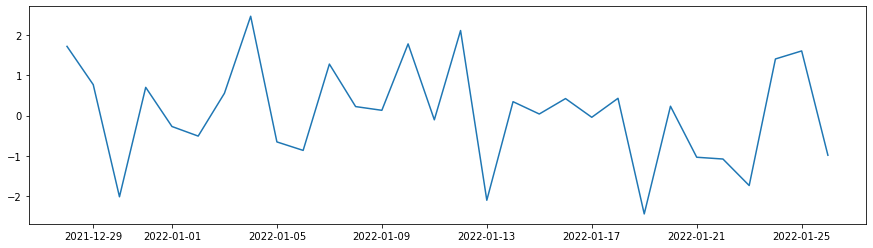

In [36]:
plt.figure(figsize=(15,4))
plt.plot(s)

## DataFrame

`DataFrame` это двумерная таблица данных. <br>
Имеет индекс и набор столбцов (возможно, имеющих разные типы). <br>
Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [71]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}

df=pd.DataFrame(d)

print(d, type(d))
print(df, type(df))

{'one': a    1
b    2
c    3
dtype: int64, 'two': a    1
b    2
c    3
d    4
dtype: int64} <class 'dict'>
   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4 <class 'pandas.core.frame.DataFrame'>


In [24]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [27]:
print(df.index, type(df.index))

Index(['a', 'b', 'c', 'd'], dtype='object') <class 'pandas.core.indexes.base.Index'>


In [29]:
print(df.columns, type(df.columns))

Index(['one', 'two'], dtype='object') <class 'pandas.core.indexes.base.Index'>


Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [31]:
df['two']

a    1
b    2
c    3
d    4
Name: two, dtype: int64

In [32]:
df.two

a    1
b    2
c    3
d    4
Name: two, dtype: int64

In [35]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [36]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [39]:
df['b':'c']

,one,two
b,2.0,2
c,3.0,3



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [45]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - название столбца.

In [49]:
print(df.loc['c'], type(df.loc['c']))

one    3.0
two    3.0
Name: c, dtype: float64 <class 'pandas.core.series.Series'>


In [55]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [54]:
df.loc['c','two']

3

In [57]:
df.loc['b':'d','two']

b    2
c    3
d    4
Name: two, dtype: int64

In [44]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [59]:
df.loc[:,'two']

a    1
b    2
c    3
d    4
Name: two, dtype: int64

К таблице можно добавлять новые столбцы.

In [72]:
df['three'] = df['one'] * df['two']
df['four'] = (df['one'] + df['two']) * df['three'] # ([1]+[2])*[3]
df['flag'] = df['two'] > 2
df['five'] = 1
df

,one,two,three,four,flag,five
a,1.0,1,1.0,2.0,False,1
b,2.0,2,4.0,16.0,False,1
c,3.0,3,9.0,54.0,True,1
d,NaN,4,NaN,NaN,True,1


Также можно удалять имеющиеся.

In [73]:
#del df['two']
del df['five']
df['foo']=0.
df

,one,two,three,four,flag,foo
a,1.0,1,1.0,2.0,False,0.0
b,2.0,2,4.0,16.0,False,0.0
c,3.0,3,9.0,54.0,True,0.0
d,NaN,4,NaN,NaN,True,0.0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [76]:
df['one_tr']=df['one'][1:3]
df

,one,two,three,four,flag,foo,one_tr
a,1.0,1,1.0,2.0,False,0.0,NaN
b,2.0,2,4.0,16.0,False,0.0,2.0
c,3.0,3,9.0,54.0,True,0.0,3.0
d,NaN,4,NaN,NaN,True,0.0,NaN


In [77]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,NaN
b,2.0,2.0
c,3.0,3.0
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [78]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'f':2}})
df2

,one,one_tr
e,0,NaN
f,1,2.0


Объединим по столбцам.

In [80]:
pd.concat([df,df2], axis=0)

,one,one_tr
a,1.0,NaN
b,2.0,2.0
c,3.0,3.0
d,NaN,NaN
e,0.0,NaN
f,1.0,2.0


In [81]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


Объединим по строкам.

In [82]:
pd.concat([df,df2],axis=1)

,one,one_tr,two,three
a,1.0,NaN,0.0,NaN
b,2.0,2.0,1.0,NaN
c,3.0,3.0,NaN,2.0
d,NaN,NaN,NaN,3.0



Создадим таблицу из массива случайных чисел.

In [84]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.687842,0.994911,-1.015015,-0.723127
1,0.478324,0.227841,-1.170141,0.638303
2,-0.924752,2.002480,-0.331333,-1.419249
3,0.223369,1.013575,-0.031960,-1.664657
4,1.986312,0.431785,0.667824,-0.455569
5,-0.382958,-1.334999,0.926301,0.196824
6,0.248971,0.321120,0.536030,0.016584
7,0.834059,-1.321345,-0.542549,-0.434520
8,0.024734,0.135361,1.434997,2.433943
9,-0.366595,0.414238,-0.578767,0.277825


In [87]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df2

,A,B,C
0,-0.482142,0.732687,1.229907
1,0.098610,-1.492624,-2.351611
2,-1.254180,-0.970639,1.584683
3,-0.421055,-1.055879,-1.215375
4,0.941044,-0.511993,0.542120
5,0.380998,-0.053885,-1.326520
6,0.245365,-0.595878,-0.659285


In [89]:
df + df2

,A,B,C,D
0,-1.169984,1.727599,0.214892,NaN
1,0.576934,-1.264783,-3.521752,NaN
2,-2.178932,1.031841,1.253350,NaN
3,-0.197686,-0.042304,-1.247335,NaN
4,2.927357,-0.080208,1.209944,NaN
5,-0.001961,-1.388884,-0.400219,NaN
6,0.494336,-0.274758,-0.123255,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


Прошу заметить, что объекты **не изменяются пока мы их не перезапишем в явном виде**, например: `df = df+df2`

In [90]:
df

,A,B,C,D
0,-0.687842,0.994911,-1.015015,-0.723127
1,0.478324,0.227841,-1.170141,0.638303
2,-0.924752,2.002480,-0.331333,-1.419249
3,0.223369,1.013575,-0.031960,-1.664657
4,1.986312,0.431785,0.667824,-0.455569
5,-0.382958,-1.334999,0.926301,0.196824
6,0.248971,0.321120,0.536030,0.016584
7,0.834059,-1.321345,-0.542549,-0.434520
8,0.024734,0.135361,1.434997,2.433943
9,-0.366595,0.414238,-0.578767,0.277825


In [91]:
2 * df + 3

,A,B,C,D
0,1.624315,4.989822,0.969970,1.553746
1,3.956648,3.455682,0.659719,4.276606
2,1.150497,7.004961,2.337335,0.161501
3,3.446738,5.027150,2.936081,-0.329313
4,6.972625,3.863569,4.335648,2.088862
5,2.234083,0.330001,4.852601,3.393647
6,3.497942,3.642239,4.072060,3.033167
7,4.668118,0.357310,1.914902,2.130960
8,3.049468,3.270722,5.869995,7.867886
9,2.266811,3.828476,1.842466,3.555649


In [92]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.143362,0.288497,-0.010461,-0.113364
std,0.842364,1.014033,0.868529,1.155846
min,-0.924752,-1.334999,-1.170141,-1.664657
25%,-0.378867,0.158481,-0.569713,-0.656237
50%,0.124052,0.367679,-0.181646,-0.208968
75%,0.420986,0.854130,0.634876,0.257574
max,1.986312,2.002480,1.434997,2.433943


Можем отсортировать по значениям в колонке.

In [94]:
df.sort_values(by='A')

,A,B,C,D
2,-0.924752,2.002480,-0.331333,-1.419249
0,-0.687842,0.994911,-1.015015,-0.723127
5,-0.382958,-1.334999,0.926301,0.196824
9,-0.366595,0.414238,-0.578767,0.277825
8,0.024734,0.135361,1.434997,2.433943
3,0.223369,1.013575,-0.031960,-1.664657
6,0.248971,0.321120,0.536030,0.016584
1,0.478324,0.227841,-1.170141,0.638303
7,0.834059,-1.321345,-0.542549,-0.434520
4,1.986312,0.431785,0.667824,-0.455569


Атрибут iloc подобен loc: первый индекс - индекс строки, второй - индекс столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [96]:
df

,A,B,C,D
0,-0.687842,0.994911,-1.015015,-0.723127
1,0.478324,0.227841,-1.170141,0.638303
2,-0.924752,2.002480,-0.331333,-1.419249
3,0.223369,1.013575,-0.031960,-1.664657
4,1.986312,0.431785,0.667824,-0.455569
5,-0.382958,-1.334999,0.926301,0.196824
6,0.248971,0.321120,0.536030,0.016584
7,0.834059,-1.321345,-0.542549,-0.434520
8,0.024734,0.135361,1.434997,2.433943
9,-0.366595,0.414238,-0.578767,0.277825


In [95]:
df.iloc[2]

A   -0.924752
B    2.002480
C   -0.331333
D   -1.419249
Name: 2, dtype: float64

In [97]:
df.iloc[1:3, 0:2]

,A,B
1,0.478324,0.227841
2,-0.924752,2.002480


In [98]:
df.iloc[1:3,0:2]

,A,B
1,0.478324,0.227841
2,-0.924752,2.002480


Посчитаем кумулятивные суммы.

In [99]:
cs=df.cumsum()
cs

,A,B,C,D
0,-0.687842,0.994911,-1.015015,-0.723127
1,-0.209519,1.222752,-2.185156,-0.084824
2,-1.134270,3.225232,-2.516488,-1.504073
3,-0.910901,4.238807,-2.548448,-3.168730
4,1.075411,4.670592,-1.880624,-3.624299
5,0.692453,3.335593,-0.954323,-3.427475
6,0.941424,3.656712,-0.418293,-3.410891
7,1.775483,2.335367,-0.960842,-3.845412
8,1.800217,2.470728,0.474155,-1.411468
9,1.433623,2.884967,-0.104612,-1.133644


И построим график.

In [100]:
plt.plot(cs)

NameError: name 'plt' is not defined

## Чтение файлов

Так как основная форма обмена информации это таблицы, то нужно научиться загружать их и записывать.<br>
В `Pandas` есть удобные методы для чтения`.read_csv()`/`.read_excel()`/`.read_table()` и `.to_csv()`/`.to_excel()`

Прочитаем файл и вглянем на его.

In [102]:
data = pd.read_csv('../data/bank.csv',sep=';')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
data = pd.read_csv('../data/bank.xlsx',sep=';')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 5


In [103]:
data = pd.read_excel('../data/bikes_rent.xls')

In [104]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600


Создами колонку с кумулятивной суммой поездок.

In [105]:
data['cum_sum'] = data['cnt'].cumsum()

In [11]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,cum_sum
0,1,0,1,0,6,0,2,985,985
1,1,0,1,0,0,0,2,801,1786
2,1,0,1,0,1,1,1,1349,3135
3,1,0,1,0,2,1,1,1562,4697
4,1,0,1,0,3,1,1,1600,6297


Перезапишем наш файл.

In [106]:
data.to_csv('../data/bikes_rent.csv', index=False)

С запись в экселевский формат немного длиннее. Сначало нам нужно создать объект, который будет записывать файл и в него передать нашу таблицу.

In [107]:
writer = pd.ExcelWriter('bikes_rent.xlsx')
data.to_excel(writer, sheet_name ='bikes_rent_sheet')